# Phase Hamiltonian Mapper I

## Use Sympy to map objective functions into Hamiltonians consisting of pauli matrices.

In [1]:
# Import Sympy and all it libraries
from sympy import *

### Using Sympy we have to define certain structure in order to get the Hamiltonian mapped correctly
### The objective function should be defined with a variable list and the function itself
### For example:

In [2]:
expr = '(x_l*x_m)*(x_i*x_j)'
var = ['x_i', 'x_j', 'x_l','x_m']
sympify(expr)

x_i*x_j*x_l*x_m

### Firstly we need ot check if the variables in the list matches those in given  in  the objective function:

In [3]:
for v in var:
            if(v in expr):
                pass
            else:
                raise ValueError('Variables Mismatch! Unable to find {} in the Objective Function: {}'.format(v, expr))

### Then we need to define the Pauli matrices and the Identity Matrices based on the number variables there are:

In [4]:
# init function
I = symbols('I')
Z = []
X = []
Y = []

# Next we define the pauli Z:
for i in range(len(var)):
    Z.append(symbols('Z_{}'.format(var[i][len(var[i])-1])))
    Y.append(symbols('Y_{}'.format(var[i][len(var[i])-1])))
    X.append(symbols('Y_{}'.format(var[i][len(var[i])-1])))

### Since for each x term we substitute it with 1/2(I - Z) term but first we need to convert the expression into a sympy

In [5]:
sym_expr = sympify(expr)

for i in range(len(var)):
    s_term = (1/2)*(I - Z[i])
    sym_expr = sym_expr.subs(var[i],s_term)
    

sym_expr = expand(sym_expr)
sym_expr

0.0625*I**4 - 0.0625*I**3*Z_i - 0.0625*I**3*Z_j - 0.0625*I**3*Z_l - 0.0625*I**3*Z_m + 0.0625*I**2*Z_i*Z_j + 0.0625*I**2*Z_i*Z_l + 0.0625*I**2*Z_i*Z_m + 0.0625*I**2*Z_j*Z_l + 0.0625*I**2*Z_j*Z_m + 0.0625*I**2*Z_l*Z_m - 0.0625*I*Z_i*Z_j*Z_l - 0.0625*I*Z_i*Z_j*Z_m - 0.0625*I*Z_i*Z_l*Z_m - 0.0625*I*Z_j*Z_l*Z_m + 0.0625*Z_i*Z_j*Z_l*Z_m

### Now we have to simpify the expressions by 
### 1. Multiplcation with the Identity Matrix
### 2. Remove any global factors/ Identity Matrix

In [6]:
sym_expr = sym_expr.subs(I,1)
coe = sym_expr.as_coefficients_dict()

g_phase = coe.get(1) # remove the global phase/values without Z terms
sym_expr = sym_expr - g_phase
sym_expr

0.0625*Z_i*Z_j*Z_l*Z_m - 0.0625*Z_i*Z_j*Z_l - 0.0625*Z_i*Z_j*Z_m + 0.0625*Z_i*Z_j - 0.0625*Z_i*Z_l*Z_m + 0.0625*Z_i*Z_l + 0.0625*Z_i*Z_m - 0.0625*Z_i - 0.0625*Z_j*Z_l*Z_m + 0.0625*Z_j*Z_l + 0.0625*Z_j*Z_m - 0.0625*Z_j + 0.0625*Z_l*Z_m - 0.0625*Z_l - 0.0625*Z_m

In [7]:
p_expr = Poly(sym_expr,Z)
qc_list = p_expr.monoms()
print(var)
qc_list

['x_i', 'x_j', 'x_l', 'x_m']


[(1, 1, 1, 1),
 (1, 1, 1, 0),
 (1, 1, 0, 1),
 (1, 1, 0, 0),
 (1, 0, 1, 1),
 (1, 0, 1, 0),
 (1, 0, 0, 1),
 (1, 0, 0, 0),
 (0, 1, 1, 1),
 (0, 1, 1, 0),
 (0, 1, 0, 1),
 (0, 1, 0, 0),
 (0, 0, 1, 1),
 (0, 0, 1, 0),
 (0, 0, 0, 1)]

## Using the Library to generate Hamiltonians!
### Now we make all of this into a python class to aid us with the generation of the Quantum circuit

In [8]:
import P_Hamil as ph

### Import the P_Hamil to aid with the construction of the circuit
### Define the Object Function and the variables:

In [9]:
obj = '-5*x_1*x_2*x_3*x_4 + 7*x_2*x_3*x_4 -7*x_1*x_2*x_4 + 2*x_2*x_3 + 20'
var = ['x_1','x_2','x_3','x_4']

### Create an instance of the Phase Hamiltonian generator

In [10]:
pham = ph.P_Hamil(obj,var)

### To get the objective function:

In [11]:
pham.get_ObjFun()

-5*x_1*x_2*x_3*x_4 - 7*x_1*x_2*x_4 + 7*x_2*x_3*x_4 + 2*x_2*x_3 + 20

### In order to get the Hamiltonian as an expression of Pauli Matrix representation, we need to use the Hamify() function
### After which we can get the Phase/Cost Hamiltonian:

In [12]:
pham.Hamify()
pham.get_PHamil()

-0.3125*Z_1*Z_2*Z_3*Z_4 + 0.3125*Z_1*Z_2*Z_3 + 1.1875*Z_1*Z_2*Z_4 - 0.5625*Z_1*Z_2 + 0.3125*Z_1*Z_3*Z_4 + 0.3125*Z_1*Z_3 - 0.5625*Z_1*Z_4 - 1.1875*Z_1 - 0.5625*Z_2*Z_3*Z_4 + 1.6875*Z_2*Z_3 + 0.3125*Z_2*Z_4 - 0.8125*Z_2 + 1.1875*Z_3*Z_4 + 0.0625*Z_3 - 0.3125*Z_4

In [13]:
pham.get_QClist()

[(1, 1, 1, 1),
 (1, 1, 1, 0),
 (1, 1, 0, 1),
 (1, 1, 0, 0),
 (1, 0, 1, 1),
 (1, 0, 1, 0),
 (1, 0, 0, 1),
 (1, 0, 0, 0),
 (0, 1, 1, 1),
 (0, 1, 1, 0),
 (0, 1, 0, 1),
 (0, 1, 0, 0),
 (0, 0, 1, 1),
 (0, 0, 1, 0),
 (0, 0, 0, 1)]

### The perqubitmap function aids with the direct mapping of variables in the objective function to individual qubits in the Quantum Circuit:

In [14]:
qc = pham.perQubitMap(0.726354,p=1,barrier=True,initial_Hadamard=True)

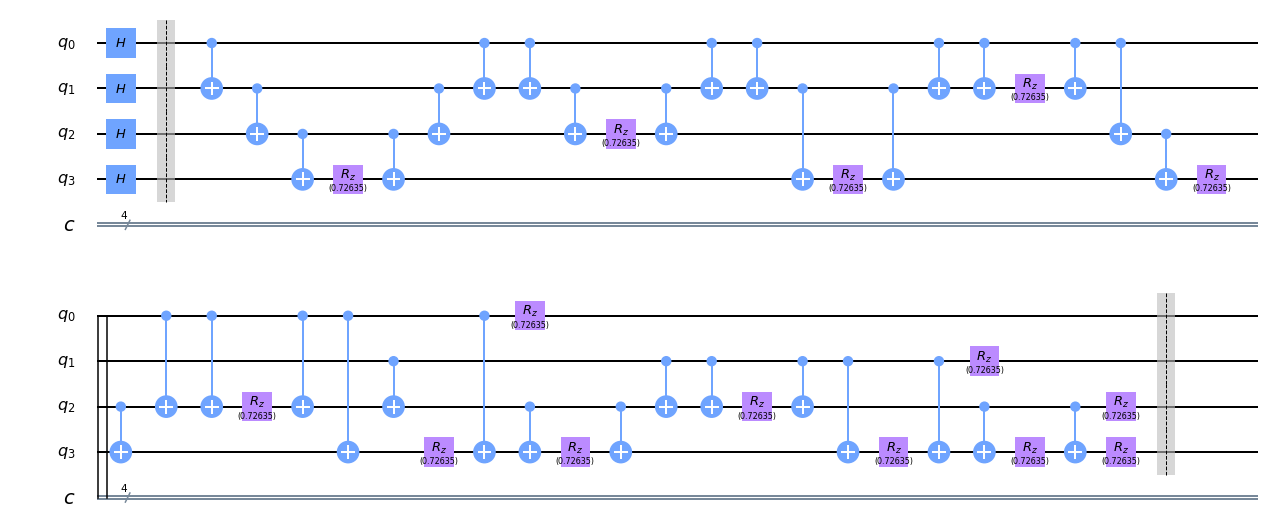

In [15]:
pham.drawCircuit(output='mpl')

In [16]:
import M_Hamil as xh
mixer = xh.M_Hamil(obj,var)

In [17]:
qc2 = mixer.generalXMixer(1.99999,1,measure=True)

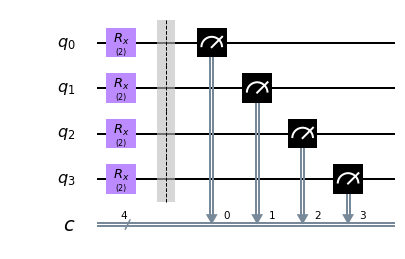

In [18]:
qc2.draw(output='mpl')

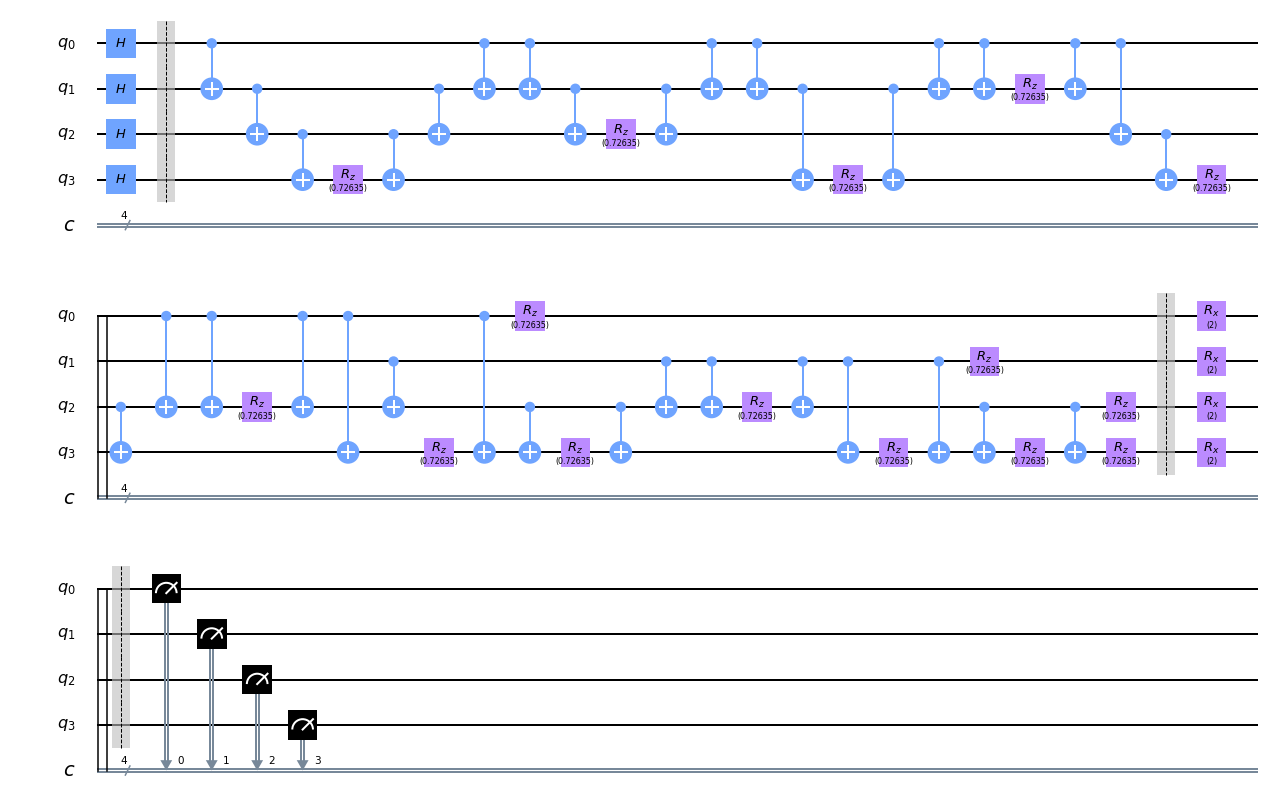

In [19]:
full_circuit = qc + qc2
full_circuit.draw(output='mpl')

In [20]:
# importing Qiskit
from qiskit import Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, execute

from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram

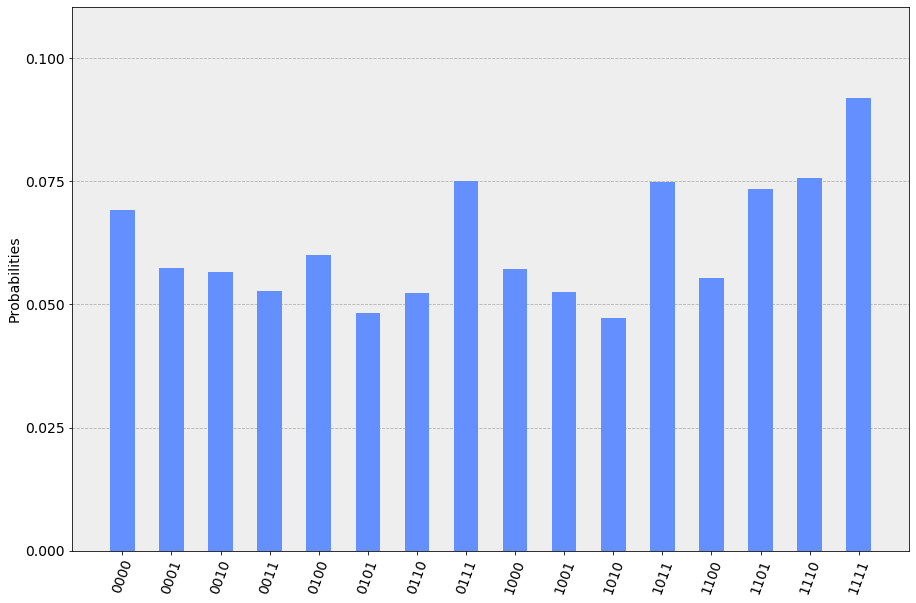

In [21]:
# run on local simulator
backend      = Aer.get_backend("qasm_simulator")
shots        = 10000

simulate     = execute(full_circuit, backend=backend, shots=shots)
Hamil_results = simulate.result()

plot_histogram(Hamil_results.get_counts(),figsize = (15,10),bar_labels = False)

In [22]:
pham.expectation_value(Hamil_results,shots)

20.1416000000000

In [23]:
import numpy as np
from scipy import optimize as opt
from scipy.optimize import Bounds

bounds = [[0, 2*np.pi], [0, np.pi]]
cons = []
for factor in range(len(bounds)):
    lower, upper = bounds[factor]
    l = {'type': 'ineq',
         'fun': lambda x, lb=lower, i=factor: x[i] - lb}
    u = {'type': 'ineq',
         'fun': lambda x, ub=upper, i=factor: ub - x[i]}
    cons.append(l)
    cons.append(u)
    
def QAOA(hyperparams):
    # Instansiate the Quantum circuit
    hamiltonian = pham.perQubitMap(hyperparams[0],p=1,barrier=True,initial_Hadamard=True)+ mixer.generalXMixer(hyperparams[1],1,measure=True)
    
    
    backend      = Aer.get_backend("qasm_simulator")
    shots        = 10000

    simulate     = execute(hamiltonian, backend=backend, shots=shots)
    Hamil_results = simulate.result()
    
    r = pham.expectation_value(Hamil_results,shots);
    
    return r

In [24]:
hyperparams = [1.8, 1.5]
res = opt.minimize(QAOA, hyperparams,constraints=cons, tol= 1e-3, method='COBYLA')

In [25]:
print(res)
hyperparams = res.x

     fun: 19.513299999999997
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 30
  status: 1
 success: True
       x: array([2.06896356, 2.12932742])


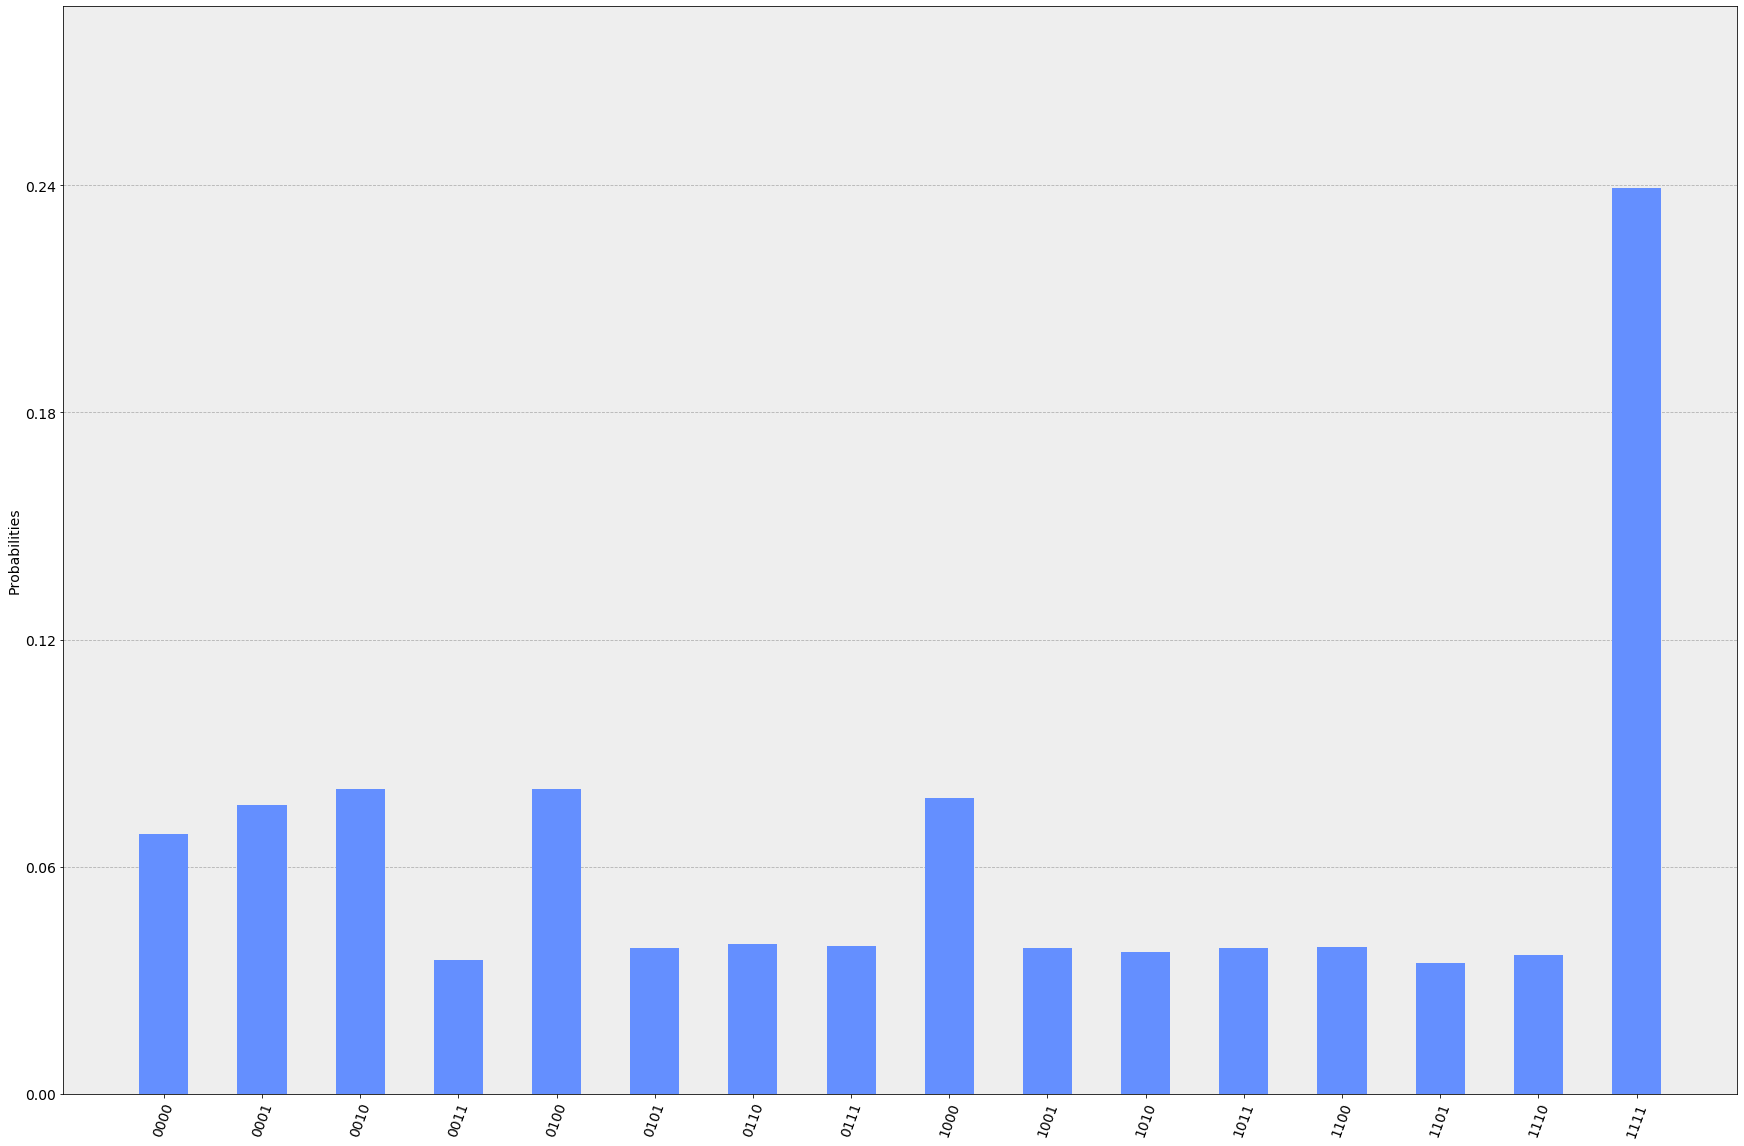

In [26]:
hamiltonian = pham.perQubitMap(hyperparams[0],p=1,barrier=True,initial_Hadamard=True)+ mixer.generalXMixer(hyperparams[1],1,measure=True)
backend      = Aer.get_backend("qasm_simulator")
shots        = 10000

simulate     = execute(hamiltonian, backend=backend, shots=shots)
Hamil_results = simulate.result()
plot_histogram(Hamil_results.get_counts(),figsize = (30,20),bar_labels = False)